<a href="https://colab.research.google.com/github/deigo-lps/Image-Processing/blob/main/Atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mostra_histograma(imagem,titulo):
  plt.hist(imagem.flatten(), bins=256, range=(0, 256))
  plt.title(titulo)
  plt.xlabel('Valor de cinza')
  plt.ylabel('Frequência')
  plt.show()

def equalizacao(imagem):
  niveis_equalizados = np.zeros_like(imagem).flatten()
  imagem_flat = imagem.flatten()
  size = imagem.size
  nivel_equalizado = np.zeros(256).astype(np.uint8)
  def G(k):
    result = 0
    for i in range(0,k):
      result = result + np.count_nonzero(imagem_flat == i)/size
    return result
  for i in range(0,256):
    nivel_equalizado[i] = int(G(i)*255)
  for i in range(0,size):
    niveis_equalizados[i]=nivel_equalizado[imagem_flat[i]]
  return (niveis_equalizados).reshape(imagem.shape)

def gama(imagem,gama):
  for i in range(len(imagem)):
    for j in range(len(imagem[i])):
      imagem[i][j] = ((imagem[i][j]/np.max(imagem))**gama)*np.max(imagem)
  return imagem

def jaccard(img_array,img_arrayf,t):
  ME = 0
  dimensao = img_arrayf.shape

  for i in range(img_arrayf.shape[0]):
    for j in range(img_arrayf.shape[1]):
      if int(img_arrayf[i,j]) - int(img_array[i,j]) > 0 and (int(img_arrayf[i,j]) - int(img_array[i,j])) <=t:
        ME += 1
      elif (int(img_arrayf[i,j]) - int(img_array[i,j]))*(-1) <= t:
        ME +=1
  ME = ME/(dimensao[0]*dimensao[1])
  return ME

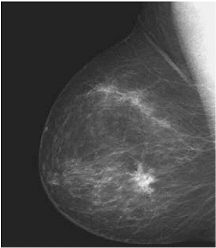

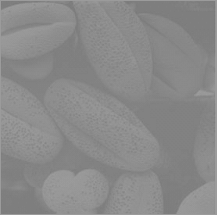

In [ ]:
img1_array = np.array(Image.open("mammogram.bmp").convert("L"))
img2_array = np.array(Image.open("polem.bmp").convert("L"))

Image.fromarray(img1_array).show()
Image.fromarray(img2_array).show()

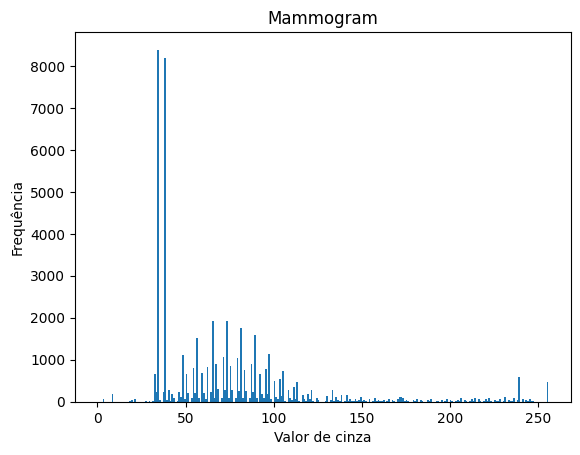

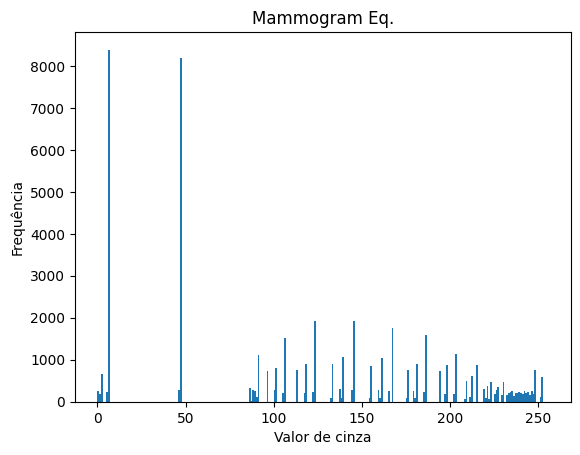

In [ ]:
img1_array = np.array(Image.open("mammogram.bmp").convert("L"))
img2_array = np.array(Image.open("polem.bmp").convert("L"))

mostra_histograma(img1_array,'Mammogram')
img1_array = equalizacao(img1_array)
mostra_histograma(img1_array,'Mammogram Eq.')

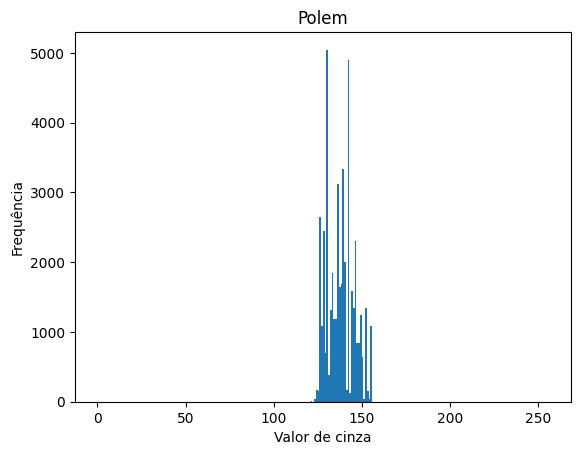

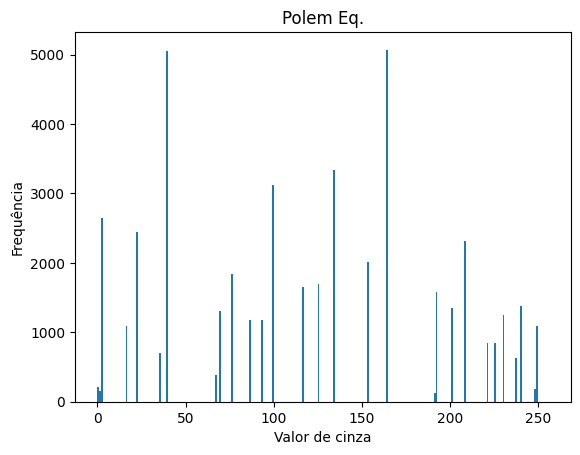

In [ ]:
mostra_histograma(img2_array,'Polem')
img2_array = equalizacao(img2_array)
mostra_histograma(img2_array,'Polem Eq.')

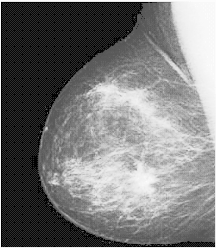

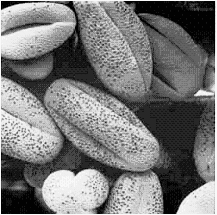

In [ ]:
Image.fromarray(img1_array).show()
Image.fromarray(img2_array).show()

Original: 


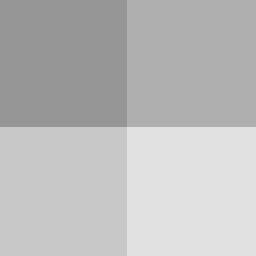

Com Gaussiano: 


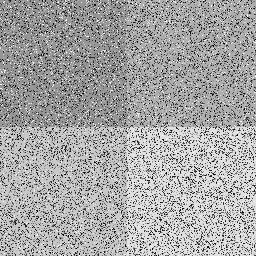

Com Sal Pimenta: 


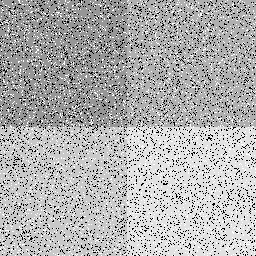

In [ ]:
original_array = np.array(Image.open("c.jpg").convert("L"))
img_gauss_array = np.array(Image.open("c_gauss.png").convert("L"))
img_salt_array = np.array(Image.open("c_sal_pimenta.png").convert("L"))

print("Original: ")
Image.fromarray(original_array).show()
print("Com Gaussiano: ")
Image.fromarray(img_gauss_array).show()
print("Com Sal Pimenta: ")
Image.fromarray(img_salt_array).show()

In [ ]:
gauss_eq = equalizacao(img_gauss_array)
salt_eq = equalizacao(img_salt_array)
gauss_gama = gama(img_gauss_array,0.5)
salt_gama = gama(img_salt_array,0.5)

Coeficiente Jaccard Gauss:  0.7163238525390625
Coeficiente Jaccard Gauss Eq.:  0.0647735595703125
Coeficiente Jaccard Gauss Gama:  0.9944000244140625
Coeficiente Jaccard Sal Pimenta:  0.8997955322265625
Coeficiente Jaccard Sal Pimenta Eq.:  0.10400390625
Coeficiente Jaccard Sal Pimenta Gama:  0.8997955322265625
Gauss Eq:


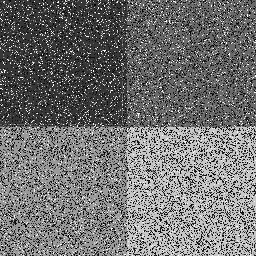

Gauss Gama:


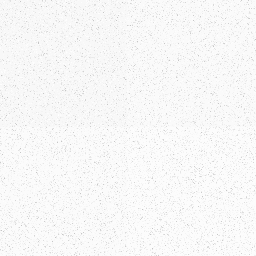

Salt Eq:


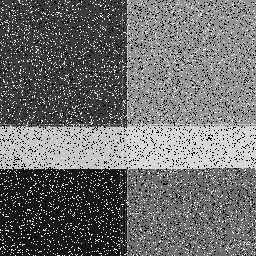

Salt Eq:


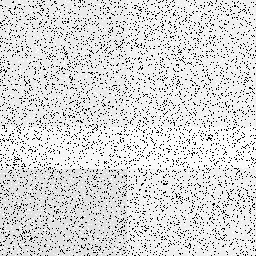

In [ ]:
print("Coeficiente Jaccard Gauss: ",jaccard(original_array,img_gauss_array,0))
print("Coeficiente Jaccard Gauss Eq.: ",jaccard(original_array,gauss_eq,0))
print("Coeficiente Jaccard Gauss Gama: ",jaccard(original_array,gauss_gama,0))

print("Coeficiente Jaccard Sal Pimenta: ",jaccard(original_array,img_salt_array,0))
print("Coeficiente Jaccard Sal Pimenta Eq.: ",jaccard(original_array,salt_eq,0))
print("Coeficiente Jaccard Sal Pimenta Gama: ",jaccard(original_array,salt_gama,0))

print("Gauss Eq:")
Image.fromarray(gauss_eq).show()
print("Gauss Gama:")
Image.fromarray(gauss_gama).show()
print("Salt Eq:")
Image.fromarray(salt_eq).show()
print("Salt Eq:")
Image.fromarray(salt_gama).show()